In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings=pd.read_csv('ml-100k/u.data',sep='\t'
                   ,header=None,names=['user_id','movie_id','ratings'],
                   usecols=[0,1,2])

In [3]:
ratings.head()

,user_id,movie_id,ratings
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [4]:
ratings.user_id.unique().size

943

In [5]:
ratings.movie_id.unique().size

1682

In [6]:
cols="movie_id|movie title|release date|video release date|IMDb URL|unknown|Action|Adventure|Animation|Children's|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western"
cols=cols.split('|')

In [7]:
movie_title = pd.read_csv('ml-100k/u.item', sep='|',
                         encoding='latin', header=None,
                         names=['movie id', 'movie title'],
                         usecols=[0, 1],
                         index_col='movie id')
pd.set_option("display.max_rows", None, "display.max_columns", None)

movie_title

,movie title
movie id,
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)
6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
7,Twelve Monkeys (1995)
8,Babe (1995)
9,Dead Man Walking (1995)


In [8]:
movies=pd.read_csv('ml-100k/u.item',sep='|',encoding='latin',header=None,names=cols,index_col='movie_id')
movies.drop(['movie title','release date','video release date','IMDb URL','unknown'],axis=1,inplace=True)

In [9]:
movies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [10]:
movie_rating=ratings.groupby('movie_id').agg({'ratings':'mean','user_id':'count'})

In [11]:
movie_rating.rename({'ratings':'avg_rating','user_id':'count'},axis=1,inplace=True)

In [12]:
movie_rating.head()

,avg_rating,count
movie_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86


In [13]:
movie_rating['count'].max()

583

In [14]:
movie_rating['count'].min()

1

In [15]:
movie_rating['count'].mean()

59.45303210463734

[]

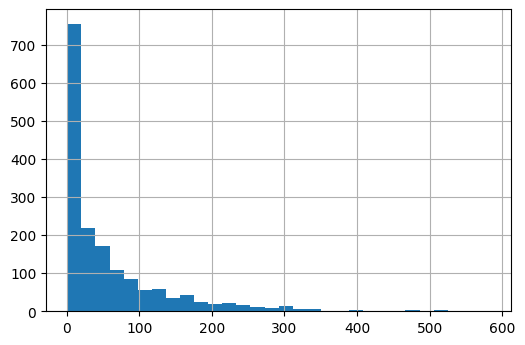

In [16]:
plt.figure(dpi=100)
movie_rating['count'].hist(bins=30)
plt.plot()

In [17]:
mx=movie_rating['count'].max()
mi=movie_rating['count'].min()

movie_rating['Popularity']=movie_rating['count'].apply(lambda v :round((v-mi)/(mx-mi),2))
movie_rating.drop('count',axis=1,inplace=True)

In [18]:
movie_rating.head()

,avg_rating,Popularity
movie_id,,
1,3.878319,0.77
2,3.206107,0.22
3,3.033333,0.15
4,3.550239,0.36
5,3.302326,0.15


In [19]:
movies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [20]:
movies.isna().sum()

Action         0
Adventure      0
Animation      0
Children's     0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64

In [21]:
movie_rating[movie_rating['Popularity']==1].index.values[0]

50

In [22]:
movie_rating.isna().sum()

avg_rating    0
Popularity    0
dtype: int64

In [23]:
X=pd.merge(movies,movie_rating,left_index=True,right_index=True)

In [24]:
X.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,avg_rating,Popularity
movie_id,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.878319,0.77
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.206107,0.22
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.033333,0.15
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3.550239,0.36
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3.302326,0.15


In [25]:
from scipy.spatial.distance import cosine,euclidean

In [26]:
def distance(v1,v2):
    return cosine(v1,v2)



In [27]:
def similar_movies(mid,k=5):
    X_new=X.loc[mid].values
    result=[]
    for ix,each_movie in zip(X.index,X.values):
        d=distance(X_new,each_movie)
        result.append((d,ix))
    result.sort()
    movie_ids=[ix for d,ix in result[:k
                                    ]]
    return movie_title.loc[movie_ids]

    

In [30]:
similar_movies(1596,k=20)

,movie title
movie id,
1596,Nemesis 2: Nebula (1995)
976,Solo (1996)
145,"Lawnmower Man, The (1992)"
771,Johnny Mnemonic (1995)
825,"Arrival, The (1996)"
916,Lost in Space (1998)
298,Face/Off (1997)
195,"Terminator, The (1984)"
96,Terminator 2: Judgment Day (1991)
